In [4]:
import numpy as np 

In [5]:
class Layer:
    def __init__(self):
        self.input = None 
        self.output = None 

    def forward(self, input):
        pass 

    def backward(self, output_gradient, learning_rate):
        pass

In [6]:
class Dense(Layer):

    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
    
    def forward(self, input):
        self.input = input 
        return np.dot(self.weights, self.input) + self.bias 
    
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return np.dot(self.weights.T, output_gradient)

In [7]:
class Activation(Layer):
    
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime 

    def forward(self, input):
        self.input = input 
        return self.activation(self.input)
    
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [11]:
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x)**2
        super().__init__(tanh, tanh_prime)

In [12]:
import numpy as np 

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true)/ np.size(y_true)

In [16]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

In [17]:

X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

network = [
    Dense(2,3), 
    Tanh(), 
    Dense(3,1),
    Tanh()
]

epochs = 10000
learning_rate = .1

for e in range(epochs):

    for x, y in zip(X, Y):
        error = 0
        output = x 
        for layer in network:
            output = layer.forward(output)

        error += mse(y, output)

        # backward 
        grad = mse_prime(y, output)

        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)

    error /= len(X)
    print("%d/%d, error = %f" %(e + 1, epochs, error))

1/10000, error = 0.043284
2/10000, error = 0.023728
3/10000, error = 0.066787
4/10000, error = 0.102437
5/10000, error = 0.118497
6/10000, error = 0.122212
7/10000, error = 0.122081
8/10000, error = 0.120955
9/10000, error = 0.119586
10/10000, error = 0.118120
11/10000, error = 0.116570
12/10000, error = 0.114940
13/10000, error = 0.113236
14/10000, error = 0.111467
15/10000, error = 0.109638
16/10000, error = 0.107755
17/10000, error = 0.105819
18/10000, error = 0.103830
19/10000, error = 0.101785
20/10000, error = 0.099682
21/10000, error = 0.097517
22/10000, error = 0.095283
23/10000, error = 0.092975
24/10000, error = 0.090585
25/10000, error = 0.088103
26/10000, error = 0.085521
27/10000, error = 0.082826
28/10000, error = 0.080004
29/10000, error = 0.077042
30/10000, error = 0.073925
31/10000, error = 0.070636
32/10000, error = 0.067163
33/10000, error = 0.063494
34/10000, error = 0.059625
35/10000, error = 0.055560
36/10000, error = 0.051311
37/10000, error = 0.046907
38/10000, 

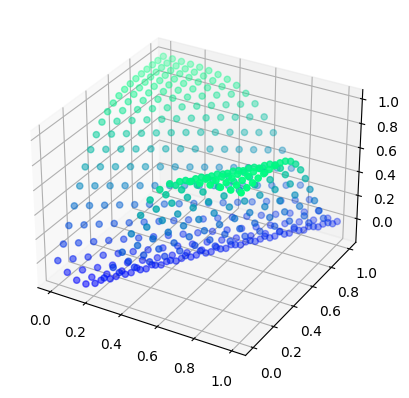

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()